# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Print out the URL for each request
        print(city_url)

        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Print out the entire response to inspect its structure
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
http://api.openweathermap.org/data/2.5/weather?q=utrik&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 169.8474, 'lat': 11.2278}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.64, 'feels_like': 299.64, 'temp_min': 299.64, 'temp_max': 299.64, 'pressure': 1010, 'humidity': 71, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.65, 'deg': 51, 'gust': 9.41}, 'clouds': {'all': 87}, 'dt': 1709262806, 'sys': {'country': 'MH', 'sunrise': 1709232949, 'sunset': 1709275830}, 'timezone': 43200, 'id': 7306518, 'name': 'Utrik', 'cod': 200}
Processing Record 2 of Set 1 | grytviken
http://api.openweathermap.org/data/2.5/weather?q=grytviken&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -36.5092, 'lat': -54.2811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'o

{'coord': {'lon': 33.3362, 'lat': 69.2551}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.06, 'feels_like': 267.06, 'temp_min': 274.06, 'temp_max': 274.06, 'pressure': 1005, 'humidity': 85, 'sea_level': 1005, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 12.42, 'deg': 198, 'gust': 19.28}, 'clouds': {'all': 100}, 'dt': 1709262809, 'sys': {'country': 'RU', 'sunrise': 1709269798, 'sunset': 1709304497}, 'timezone': 10800, 'id': 562245, 'name': 'Gadzhiyevo', 'cod': 200}
Processing Record 14 of Set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 128.8694, 'lat': 71.6872}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 253.16, 'feels_like': 246.16, 'temp_min': 253.16, 'temp_max': 253.16, 'pressure': 1024, 'humidity': 93, 'sea_level': 1024,

{'coord': {'lon': -52.8699, 'lat': 68.7098}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 255.32, 'feels_like': 248.32, 'temp_min': 255.32, 'temp_max': 255.32, 'pressure': 1003, 'humidity': 62, 'sea_level': 1003, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 12.1, 'deg': 46, 'gust': 21.85}, 'clouds': {'all': 68}, 'dt': 1709262812, 'sys': {'country': 'GL', 'sunrise': 1709290300, 'sunset': 1709325369}, 'timezone': -7200, 'id': 3424901, 'name': 'Aasiaat', 'cod': 200}
Processing Record 27 of Set 1 | al hufuf
http://api.openweathermap.org/data/2.5/weather?q=al hufuf&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 49.5653, 'lat': 25.3646}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 282.34, 'feels_like': 280.1, 'temp_min': 282.34, 'temp_max': 282.34, 'pressure': 1020, 'humidity': 29}, 'visibility': 10000, 'win

{'coord': {'lon': -79.006, 'lat': 35.139}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.6, 'feels_like': 278.6, 'temp_min': 276.97, 'temp_max': 279.9, 'pressure': 1031, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1709262815, 'sys': {'type': 1, 'id': 5387, 'country': 'US', 'sunrise': 1709207184, 'sunset': 1709248251}, 'timezone': -18000, 'id': 6941080, 'name': 'Fort Bragg', 'cod': 200}
Processing Record 40 of Set 1 | cabedelo
http://api.openweathermap.org/data/2.5/weather?q=cabedelo&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -34.8339, 'lat': -6.9811}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.52, 'feels_like': 299.52, 'temp_min': 299.52, 'temp_max': 299.52, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 

{'coord': {'lon': -176.5597, 'lat': -43.9535}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 290.27, 'feels_like': 290.28, 'temp_min': 288.61, 'temp_max': 290.27, 'pressure': 1011, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 150, 'gust': 4.02}, 'rain': {'1h': 0.3}, 'clouds': {'all': 99}, 'dt': 1709262818, 'sys': {'type': 2, 'id': 2040615, 'country': 'NZ', 'sunrise': 1709313947, 'sunset': 1709361084}, 'timezone': 49500, 'id': 4032804, 'name': 'Waitangi', 'cod': 200}
Processing Record 1 of Set 2 | puerto leguizamo
http://api.openweathermap.org/data/2.5/weather?q=puerto leguizamo&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -74.7819, 'lat': -0.1934}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.79, 'feels_like': 297.69, 'temp_min': 296.79, 'temp_max': 296.79, 'pressure': 1011, 'humidity': 95

{'coord': {'lon': -172.5159, 'lat': -8.5421}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 302.75, 'feels_like': 307.68, 'temp_min': 302.75, 'temp_max': 302.75, 'pressure': 1008, 'humidity': 72, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 6.29, 'deg': 104, 'gust': 6.5}, 'clouds': {'all': 11}, 'dt': 1709262821, 'sys': {'country': 'TK', 'sunrise': 1709314480, 'sunset': 1709358611}, 'timezone': 46800, 'id': 7522183, 'name': 'Atafu Village', 'cod': 200}
Processing Record 13 of Set 2 | olonkinbyen
http://api.openweathermap.org/data/2.5/weather?q=olonkinbyen&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -8.7187, 'lat': 70.9221}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 267.93, 'feels_like': 260.93, 'temp_min': 267.93, 'temp_max': 267.93, 'pressure': 989, 'humidity': 81, 'sea_level': 989,

{'coord': {'lon': -151.4333, 'lat': -16.7333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 302.25, 'feels_like': 306.89, 'temp_min': 302.25, 'temp_max': 302.25, 'pressure': 1012, 'humidity': 74, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.07, 'deg': 84, 'gust': 5.39}, 'rain': {'1h': 0.37}, 'clouds': {'all': 73}, 'dt': 1709262824, 'sys': {'country': 'PF', 'sunrise': 1709222733, 'sunset': 1709267463}, 'timezone': -36000, 'id': 4033205, 'name': 'Uturoa', 'cod': 200}
Processing Record 25 of Set 2 | happy valley-goose bay
http://api.openweathermap.org/data/2.5/weather?q=happy valley-goose bay&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -60.3315, 'lat': 53.3168}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 255.91, 'feels_like': 248.91, 'temp_min': 255.91, 'temp_max': 255.91, 'pressu

{'coord': {'lon': -42.0278, 'lat': -22.9661}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.37, 'feels_like': 299.32, 'temp_min': 298.37, 'temp_max': 298.37, 'pressure': 1012, 'humidity': 91, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.07, 'deg': 224, 'gust': 4.9}, 'clouds': {'all': 95}, 'dt': 1709262624, 'sys': {'country': 'BR', 'sunrise': 1709282659, 'sunset': 1709327806}, 'timezone': -10800, 'id': 3471451, 'name': 'Arraial do Cabo', 'cod': 200}
Processing Record 38 of Set 2 | kolonia
http://api.openweathermap.org/data/2.5/weather?q=kolonia&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 6.95, 'lat': 50.9333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.08, 'feels_like': 278.28, 'temp_min': 279.28, 'temp_max': 281.64, 'pressure': 995, 'humidity': 78}, 'visibility': 

{'coord': {'lon': -102.2, 'lat': 17.9583}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.34, 'feels_like': 296.83, 'temp_min': 296.34, 'temp_max': 296.34, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 0.66, 'deg': 312, 'gust': 0.78}, 'clouds': {'all': 69}, 'dt': 1709262829, 'sys': {'country': 'MX', 'sunrise': 1709212074, 'sunset': 1709254493}, 'timezone': -21600, 'id': 4026082, 'name': 'Lázaro Cárdenas', 'cod': 200}
Processing Record 0 of Set 3 | acarau
http://api.openweathermap.org/data/2.5/weather?q=acarau&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -40.12, 'lat': -2.8856}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.69, 'feels_like': 299.55, 'temp_min': 298.69, 'temp_max': 298.69, 'pressure': 1013, 'humidity': 86, 'sea_level': 1013

{'coord': {'lon': 135.4833, 'lat': -3.3667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.72, 'feels_like': 305.46, 'temp_min': 301.72, 'temp_max': 301.72, 'pressure': 1009, 'humidity': 73, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.84, 'deg': 264, 'gust': 1.87}, 'clouds': {'all': 100}, 'dt': 1709262832, 'sys': {'country': 'ID', 'sunrise': 1709240727, 'sunset': 1709284544}, 'timezone': 32400, 'id': 1634614, 'name': 'Nabire', 'cod': 200}
Processing Record 12 of Set 3 | taiohae
http://api.openweathermap.org/data/2.5/weather?q=taiohae&appid=4ede4b079a1d3489807e7498b12870f2
{'cod': '404', 'message': 'city not found'}
City not found. Skipping... 'coord'
Processing Record 13 of Set 3 | buritis
http://api.openweathermap.org/data/2.5/weather?q=buritis&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -46.4233, 'lat': -15.6178}, 'weather': [{'id': 500, 'main': 'R

{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 264.88, 'feels_like': 257.88, 'temp_min': 264.88, 'temp_max': 264.88, 'pressure': 1004, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 290, 'gust': 20.06}, 'clouds': {'all': 0}, 'dt': 1709262835, 'sys': {'type': 1, 'id': 7668, 'country': 'US', 'sunrise': 1709226297, 'sunset': 1709264367}, 'timezone': -32400, 'id': 5866583, 'name': 'Saint Paul Harbor', 'cod': 200}
Processing Record 25 of Set 3 | goundi
http://api.openweathermap.org/data/2.5/weather?q=goundi&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 17.366, 'lat': 9.3627}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 304.93, 'feels_like': 302.8, 'temp_min': 304.93, 'temp_max': 304.93, 'pressure': 1006, 'humidity': 17, 'sea_level': 1006, 'grnd_level': 964

{'coord': {'lon': 86.15, 'lat': 50.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 261.29, 'feels_like': 261.29, 'temp_min': 261.29, 'temp_max': 261.29, 'pressure': 1036, 'humidity': 78, 'sea_level': 1036, 'grnd_level': 930}, 'visibility': 10000, 'wind': {'speed': 1.26, 'deg': 102, 'gust': 1.36}, 'clouds': {'all': 94}, 'dt': 1709262838, 'sys': {'country': 'RU', 'sunrise': 1709254781, 'sunset': 1709294167}, 'timezone': 25200, 'id': 1496130, 'name': 'Onguday', 'cod': 200}
Processing Record 37 of Set 3 | conception bay south
http://api.openweathermap.org/data/2.5/weather?q=conception bay south&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -52.9981, 'lat': 47.4999}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 278.97, 'feels_like': 274.43, 'temp_min': 277.34, 'temp_max': 280.33, 'pressure': 1002, 'humidity': 96, 'sea

{'coord': {'lon': -48.5233, 'lat': -0.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.09, 'feels_like': 299.02, 'temp_min': 298.09, 'temp_max': 298.09, 'pressure': 1013, 'humidity': 91, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.84, 'deg': 16, 'gust': 5.31}, 'clouds': {'all': 97}, 'dt': 1709262841, 'sys': {'country': 'BR', 'sunrise': 1709284968, 'sunset': 1709328614}, 'timezone': -10800, 'id': 3387204, 'name': 'Soure', 'cod': 200}
Processing Record 49 of Set 3 | nanao
http://api.openweathermap.org/data/2.5/weather?q=nanao&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 136.9667, 'lat': 37.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 280.54, 'feels_like': 277.95, 'temp_min': 280.54, 'temp_max': 281.26, 'pressure': 1009, 'humidity': 74, 'sea_level': 1009, 'grnd_

{'coord': {'lon': 141.9667, 'lat': -38.2667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 294.06, 'feels_like': 293.56, 'temp_min': 294.06, 'temp_max': 294.06, 'pressure': 1014, 'humidity': 52, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.68, 'deg': 211, 'gust': 6.67}, 'clouds': {'all': 1}, 'dt': 1709262844, 'sys': {'country': 'AU', 'sunrise': 1709237778, 'sunset': 1709284382}, 'timezone': 39600, 'id': 2171099, 'name': 'Codrington', 'cod': 200}
Processing Record 11 of Set 4 | pingdu
http://api.openweathermap.org/data/2.5/weather?q=pingdu&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 119.9464, 'lat': 36.7844}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 273.87, 'feels_like': 268.35, 'temp_min': 273.87, 'temp_max': 273.87, 'pressure': 1034, 'humidity': 26, 'sea_level': 1034, 'gr

{'coord': {'lon': 115.2417, 'lat': 5.2767}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.83, 'feels_like': 303.94, 'temp_min': 300.83, 'temp_max': 300.83, 'pressure': 1011, 'humidity': 76, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.62, 'deg': 354, 'gust': 2.69}, 'clouds': {'all': 98}, 'dt': 1709262848, 'sys': {'country': 'MY', 'sunrise': 1709245859, 'sunset': 1709289127}, 'timezone': 28800, 'id': 1733782, 'name': 'Labuan', 'cod': 200}
Processing Record 23 of Set 4 | south hedland
http://api.openweathermap.org/data/2.5/weather?q=south hedland&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 118.5983, 'lat': -20.4089}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 306.11, 'feels_like': 313.11, 'temp_min': 306.11, 'temp_max': 306.11, 'pressure': 1007, 'humidity': 66}, 'vis

{'coord': {'lon': 127.0025, 'lat': -8.5186}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.74, 'feels_like': 305.59, 'temp_min': 302.74, 'temp_max': 302.74, 'pressure': 1010, 'humidity': 62, 'sea_level': 1010, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 1.75, 'deg': 300, 'gust': 2.91}, 'clouds': {'all': 93}, 'dt': 1709262851, 'sys': {'country': 'TL', 'sunrise': 1709242594, 'sunset': 1709286747}, 'timezone': 32400, 'id': 1937274, 'name': 'Lospalos', 'cod': 200}
Processing Record 36 of Set 4 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?q=saint-pierre&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 55.4781, 'lat': -21.3393}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 295.97, 'feels_like': 296.08, 'temp_min': 295.97, 'temp_max': 295.97, 'pressure': 1013, 'humidity': 68}, 'visibility':

{'coord': {'lon': 40.2064, 'lat': 29.9697}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 277.91, 'feels_like': 275.56, 'temp_min': 277.91, 'temp_max': 277.91, 'pressure': 1024, 'humidity': 31, 'sea_level': 1024, 'grnd_level': 958}, 'visibility': 10000, 'wind': {'speed': 2.75, 'deg': 112, 'gust': 2.8}, 'clouds': {'all': 6}, 'dt': 1709262558, 'sys': {'type': 1, 'id': 7431, 'country': 'SA', 'sunrise': 1709264706, 'sunset': 1709306292}, 'timezone': 10800, 'id': 102527, 'name': 'Sakakah', 'cod': 200}
Processing Record 49 of Set 4 | fortuna
http://api.openweathermap.org/data/2.5/weather?q=fortuna&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 280.62, 'feels_like': 278.26, 'temp_min': 279.34, 'temp_max': 280.89, 'pressure': 1010, 'humidity': 91}, 'visibility

{'cod': '404', 'message': 'city not found'}
City not found. Skipping... 'coord'
Processing Record 11 of Set 5 | bagua grande
http://api.openweathermap.org/data/2.5/weather?q=bagua grande&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -78.4411, 'lat': -5.7561}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.38, 'feels_like': 299.18, 'temp_min': 298.38, 'temp_max': 298.38, 'pressure': 1013, 'humidity': 85, 'sea_level': 1013, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 1.39, 'deg': 102, 'gust': 1.54}, 'rain': {'1h': 0.78}, 'clouds': {'all': 98}, 'dt': 1709262858, 'sys': {'country': 'PE', 'sunrise': 1709205592, 'sunset': 1709249572}, 'timezone': -18000, 'id': 3699484, 'name': 'Bagua Grande', 'cod': 200}
Processing Record 12 of Set 5 | viedma
http://api.openweathermap.org/data/2.5/weather?q=viedma&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -62.9967, 'lat': -40.8135}, 'weath

{'coord': {'lon': -59.957, 'lat': 46.1969}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 265.51, 'feels_like': 258.51, 'temp_min': 265.25, 'temp_max': 265.91, 'pressure': 1012, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 5.81, 'deg': 294, 'gust': 9.39}, 'clouds': {'all': 87}, 'dt': 1709262862, 'sys': {'type': 2, 'id': 2030348, 'country': 'CA', 'sunrise': 1709203208, 'sunset': 1709243086}, 'timezone': -14400, 'id': 5961564, 'name': 'Glace Bay', 'cod': 200}
Processing Record 24 of Set 5 | port saint john's
http://api.openweathermap.org/data/2.5/weather?q=port saint john's&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 29.5448, 'lat': -31.6229}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.5, 'feels_like': 292.63, 'temp_min': 292.5, 'temp_max': 292.5, 'pressure': 1012, 'humidity': 82, 'sea_level': 1012,

{'coord': {'lon': 1.4078, 'lat': 18.4411}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.58, 'feels_like': 287.64, 'temp_min': 289.58, 'temp_max': 289.58, 'pressure': 1013, 'humidity': 14, 'sea_level': 1013, 'grnd_level': 960}, 'visibility': 10000, 'wind': {'speed': 5.41, 'deg': 56, 'gust': 11.99}, 'clouds': {'all': 62}, 'dt': 1709262865, 'sys': {'country': 'ML', 'sunrise': 1709273595, 'sunset': 1709316024}, 'timezone': 0, 'id': 2455290, 'name': 'Kidal', 'cod': 200}
Processing Record 37 of Set 5 | cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.39, 'feels_like': 297.17, 'temp_min': 296.39, 'temp_max': 296.39, 'pressure': 1014, 'humidity': 92, 'sea_level': 1014, 'grnd_le

{'coord': {'lon': 33.9333, 'lat': 13.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.1, 'feels_like': 295.92, 'temp_min': 297.1, 'temp_max': 297.1, 'pressure': 1008, 'humidity': 14, 'sea_level': 1008, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 355, 'gust': 4.34}, 'clouds': {'all': 0}, 'dt': 1709262869, 'sys': {'country': 'SD', 'sunrise': 1709265618, 'sunset': 1709308390}, 'timezone': 7200, 'id': 366847, 'name': 'Singa', 'cod': 200}
Processing Record 49 of Set 5 | port augusta
http://api.openweathermap.org/data/2.5/weather?q=port augusta&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 137.7667, 'lat': -32.5}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 303.64, 'feels_like': 304.12, 'temp_min': 303.64, 'temp_max': 303.64, 'pressure': 1014, 'humidity': 45, 'sea_level': 1014, 'grnd_level': 10

{'coord': {'lon': -67.9239, 'lat': 3.8653}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.57, 'feels_like': 299.57, 'temp_min': 299.57, 'temp_max': 299.57, 'pressure': 1010, 'humidity': 67, 'sea_level': 1010, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 0.62, 'deg': 18, 'gust': 0.88}, 'clouds': {'all': 92}, 'dt': 1709262872, 'sys': {'country': 'CO', 'sunrise': 1709203383, 'sunset': 1709246734}, 'timezone': -18000, 'id': 3671450, 'name': 'Inírida', 'cod': 200}
Processing Record 11 of Set 6 | bryne
http://api.openweathermap.org/data/2.5/weather?q=bryne&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 5.6477, 'lat': 58.7354}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 278.21, 'feels_like': 278.21, 'temp_min': 276.96, 'temp_max': 279.23, 'pressure': 998, 'humidity': 97}, 'visibility': 7000, 'wind': {'sp

{'coord': {'lon': 20.2251, 'lat': 67.8557}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 272.66, 'feels_like': 267.25, 'temp_min': 272.66, 'temp_max': 272.66, 'pressure': 998, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 200}, 'clouds': {'all': 100}, 'dt': 1709262875, 'sys': {'type': 1, 'id': 1771, 'country': 'SE', 'sunrise': 1709272627, 'sunset': 1709307961}, 'timezone': 3600, 'id': 605155, 'name': 'Kiruna', 'cod': 200}
Processing Record 23 of Set 6 | oriximina
http://api.openweathermap.org/data/2.5/weather?q=oriximina&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -55.8661, 'lat': -1.7656}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.36, 'feels_like': 298.29, 'temp_min': 297.36, 'temp_max': 297.36, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 1009}, 'visibili

{'coord': {'lon': 118.4856, 'lat': 37.4564}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 273.34, 'feels_like': 270.62, 'temp_min': 273.34, 'temp_max': 273.34, 'pressure': 1034, 'humidity': 23, 'sea_level': 1034, 'grnd_level': 1033}, 'visibility': 10000, 'wind': {'speed': 2.25, 'deg': 308, 'gust': 3.57}, 'clouds': {'all': 1}, 'dt': 1709262878, 'sys': {'country': 'CN', 'sunrise': 1709246258, 'sunset': 1709287171}, 'timezone': 28800, 'id': 1812101, 'name': 'Dongying', 'cod': 200}
Processing Record 37 of Set 6 | sandnessjoen
http://api.openweathermap.org/data/2.5/weather?q=sandnessjoen&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 12.6316, 'lat': 66.0217}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.44, 'feels_like': 274.7, 'temp_min': 279.44, 'temp_max': 279.44, 'pressure': 997, 'humidity': 77, 'sea_level': 997,

{'coord': {'lon': -68.7425, 'lat': 10.3399}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.97, 'feels_like': 295.64, 'temp_min': 294.97, 'temp_max': 294.97, 'pressure': 1017, 'humidity': 93, 'sea_level': 1017, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 1.95, 'deg': 48, 'gust': 7.66}, 'clouds': {'all': 71}, 'dt': 1709262881, 'sys': {'country': 'VE', 'sunrise': 1709203791, 'sunset': 1709246719}, 'timezone': -14400, 'id': 3628423, 'name': 'San Felipe', 'cod': 200}
Processing Record 49 of Set 6 | qamdo
http://api.openweathermap.org/data/2.5/weather?q=qamdo&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 97.2333, 'lat': 31.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 271.02, 'feels_like': 267.57, 'temp_min': 271.02, 'temp_max': 271.02, 'pressure': 1013, 'humidity': 20, 'sea_level': 1013, 'grnd_leve

{'coord': {'lon': -62.4027, 'lat': -33.6441}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 297.17, 'feels_like': 297.14, 'temp_min': 297.17, 'temp_max': 297.17, 'pressure': 1014, 'humidity': 58, 'sea_level': 1014, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 3.49, 'deg': 97, 'gust': 8.93}, 'clouds': {'all': 38}, 'dt': 1709262884, 'sys': {'country': 'AR', 'sunrise': 1709287097, 'sunset': 1709333147}, 'timezone': -10800, 'id': 3865474, 'name': 'Arias', 'cod': 200}
Processing Record 11 of Set 7 | udachny
http://api.openweathermap.org/data/2.5/weather?q=udachny&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 112.4, 'lat': 66.4167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 260.07, 'feels_like': 260.07, 'temp_min': 260.07, 'temp_max': 260.07, 'pressure': 1022, 'humidity': 77, 'sea_level': 1022, '

{'coord': {'lon': 101.9603, 'lat': 30.0513}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 281.97, 'feels_like': 279.36, 'temp_min': 281.97, 'temp_max': 281.97, 'pressure': 1013, 'humidity': 37, 'sea_level': 1013, 'grnd_level': 747}, 'visibility': 10000, 'wind': {'speed': 4.77, 'deg': 269, 'gust': 15.63}, 'clouds': {'all': 67}, 'dt': 1709262887, 'sys': {'country': 'CN', 'sunrise': 1709249900, 'sunset': 1709291461}, 'timezone': 28800, 'id': 1802171, 'name': 'Kangding', 'cod': 200}
Processing Record 25 of Set 7 | kingston
http://api.openweathermap.org/data/2.5/weather?q=kingston&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -76.7936, 'lat': 17.997}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.67, 'feels_like': 299.67, 'temp_min': 295.49, 'temp_max': 300.68, 'pressure': 1017, 'humidity': 76}, 'visibility': 10000, 

{'coord': {'lon': -118.2023, 'lat': 50.9832}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 271.96, 'feels_like': 269.89, 'temp_min': 271.96, 'temp_max': 271.96, 'pressure': 997, 'humidity': 97, 'sea_level': 997, 'grnd_level': 943}, 'visibility': 6236, 'wind': {'speed': 1.59, 'deg': 232, 'gust': 1.38}, 'clouds': {'all': 100}, 'dt': 1709262891, 'sys': {'country': 'CA', 'sunrise': 1709217498, 'sunset': 1709256749}, 'timezone': -28800, 'id': 6121621, 'name': 'Revelstoke', 'cod': 200}
Processing Record 40 of Set 7 | minas de marcona
http://api.openweathermap.org/data/2.5/weather?q=minas de marcona&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -75.1103, 'lat': -15.2119}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.37, 'feels_like': 292.54, 'temp_min': 292.37, 'temp_max': 292.37, 'pressure': 1014, 'humidity': 84

{'coord': {'lon': 26.9167, 'lat': -6.05}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 293.14, 'feels_like': 293.75, 'temp_min': 293.14, 'temp_max': 293.14, 'pressure': 1010, 'humidity': 98, 'sea_level': 1010, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 1.18, 'deg': 138, 'gust': 1.31}, 'clouds': {'all': 39}, 'dt': 1709262893, 'sys': {'country': 'CD', 'sunrise': 1709266695, 'sunset': 1709310681}, 'timezone': 7200, 'id': 215668, 'name': 'Kabalo', 'cod': 200}
Processing Record 2 of Set 8 | leeton
http://api.openweathermap.org/data/2.5/weather?q=leeton&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 146.4, 'lat': -34.5667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 308.76, 'feels_like': 308.07, 'temp_min': 308.76, 'temp_max': 310.31, 'pressure': 1012, 'humidity': 27, 'sea_level': 1012, 'grnd_lev

{'coord': {'lon': 177.4167, 'lat': -17.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 304.15, 'feels_like': 310.75, 'temp_min': 304.15, 'temp_max': 304.15, 'pressure': 1011, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 280}, 'clouds': {'all': 40}, 'dt': 1709262709, 'sys': {'type': 1, 'id': 7279, 'country': 'FJ', 'sunrise': 1709230172, 'sunset': 1709274974}, 'timezone': 43200, 'id': 2202064, 'name': 'Nadi', 'cod': 200}
Processing Record 14 of Set 8 | kapa'a
http://api.openweathermap.org/data/2.5/weather?q=kapa'a&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 295.96, 'feels_like': 296.25, 'temp_min': 295.64, 'temp_max': 299.14, 'pressure': 1019, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 70}, 'r

{'coord': {'lon': 166.0102, 'lat': 10.1657}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.34, 'feels_like': 302.52, 'temp_min': 300.34, 'temp_max': 300.34, 'pressure': 1009, 'humidity': 72, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.2, 'deg': 61, 'gust': 10.56}, 'clouds': {'all': 73}, 'dt': 1709262899, 'sys': {'country': 'MH', 'sunrise': 1709233835, 'sunset': 1709276786}, 'timezone': 43200, 'id': 7306529, 'name': 'Wotho', 'cod': 200}
Processing Record 26 of Set 8 | gwadar
http://api.openweathermap.org/data/2.5/weather?q=gwadar&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 62.3254, 'lat': 25.1216}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 295.71, 'feels_like': 295.9, 'temp_min': 295.71, 'temp_max': 295.71, 'pressure': 1012, 'humidity': 72, 'sea_level': 1012, 'grnd_level': 

{'coord': {'lon': 105.8817, 'lat': 53.9606}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 267.62, 'feels_like': 263.91, 'temp_min': 267.62, 'temp_max': 267.62, 'pressure': 1025, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 277, 'gust': 5.36}, 'clouds': {'all': 100}, 'dt': 1709262906, 'sys': {'type': 2, 'id': 2088005, 'country': 'RU', 'sunrise': 1709250305, 'sunset': 1709289173}, 'timezone': 28800, 'id': 2023333, 'name': 'Kachug', 'cod': 200}
Processing Record 39 of Set 8 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.38, 'feels_like': 285.64, 'temp_min': 286.38, 'temp_max': 286.38, 'pressure': 1038, 'humidity': 72, 'sea

{'coord': {'lon': -117.5857, 'lat': 53.4001}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 260.9, 'feels_like': 256.5, 'temp_min': 260.9, 'temp_max': 260.9, 'pressure': 1005, 'humidity': 97, 'sea_level': 1005, 'grnd_level': 882}, 'visibility': 291, 'wind': {'speed': 1.96, 'deg': 47, 'gust': 4.11}, 'snow': {'1h': 0.15}, 'clouds': {'all': 99}, 'dt': 1709262893, 'sys': {'country': 'CA', 'sunrise': 1709217543, 'sunset': 1709256409}, 'timezone': -25200, 'id': 5975503, 'name': 'Hinton', 'cod': 200}
Processing Record 1 of Set 9 | grand falls-windsor
http://api.openweathermap.org/data/2.5/weather?q=grand falls-windsor&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -55.6649, 'lat': 48.9332}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 268.17, 'feels_like': 261.17, 'temp_min': 268.17, 'temp_max': 268.17, 'pressure': 1003, 'humidity

{'coord': {'lon': 70.3667, 'lat': 20.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.85, 'feels_like': 298.18, 'temp_min': 297.85, 'temp_max': 297.85, 'pressure': 1013, 'humidity': 69, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.44, 'deg': 324, 'gust': 7.62}, 'clouds': {'all': 1}, 'dt': 1709262913, 'sys': {'country': 'IN', 'sunrise': 1709257137, 'sunset': 1709299386}, 'timezone': 19800, 'id': 1253237, 'name': 'Verāval', 'cod': 200}
Processing Record 13 of Set 9 | tindouf
http://api.openweathermap.org/data/2.5/weather?q=tindouf&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -8.1474, 'lat': 27.6711}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.47, 'feels_like': 287.55, 'temp_min': 289.47, 'temp_max': 289.47, 'pressure': 1016, 'humidity': 15, 'sea_level': 1016, 'grnd_level

{'coord': {'lon': 72.642, 'lat': 10.5669}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.72, 'feels_like': 303.46, 'temp_min': 300.72, 'temp_max': 300.72, 'pressure': 1013, 'humidity': 74, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 0.52, 'deg': 25, 'gust': 0.78}, 'clouds': {'all': 71}, 'dt': 1709262916, 'sys': {'country': 'IN', 'sunrise': 1709256249, 'sunset': 1709299182}, 'timezone': 19800, 'id': 1267390, 'name': 'Kavaratti', 'cod': 200}
Processing Record 25 of Set 9 | semey
http://api.openweathermap.org/data/2.5/weather?q=semey&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 80.2275, 'lat': 50.4111}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 253.27, 'feels_like': 246.27, 'temp_min': 253.27, 'temp_max': 253.27, 'pressure': 1030, 'humidity': 71}, 'visibility': 6000, 'wind': {'s

{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 295.92, 'feels_like': 296.32, 'temp_min': 295.92, 'temp_max': 295.92, 'pressure': 1016, 'humidity': 79, 'sea_level': 1016, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.43, 'deg': 83, 'gust': 4.58}, 'clouds': {'all': 84}, 'dt': 1709262920, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1709259242, 'sunset': 1709304287}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
Processing Record 37 of Set 9 | pimenta bueno
http://api.openweathermap.org/data/2.5/weather?q=pimenta bueno&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -61.1936, 'lat': -11.6725}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.28, 'feels_like': 298.18, 'temp_min': 297.28, 'temp_max': 297.28, 'pressure': 

{'coord': {'lon': -157.9253, 'lat': 21.6477}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.99, 'feels_like': 297.36, 'temp_min': 296.54, 'temp_max': 299.13, 'pressure': 1018, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 83, 'gust': 8.05}, 'clouds': {'all': 100}, 'dt': 1709262923, 'sys': {'type': 2, 'id': 2024501, 'country': 'US', 'sunrise': 1709225571, 'sunset': 1709267741}, 'timezone': -36000, 'id': 5850027, 'name': 'Lā‘ie', 'cod': 200}
Processing Record 0 of Set 10 | colonia
http://api.openweathermap.org/data/2.5/weather?q=colonia&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 6.95, 'lat': 50.9333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.08, 'feels_like': 278.28, 'temp_min': 279.28, 'temp_max': 281.64, 'pressure': 995, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed

{'coord': {'lon': 81.4808, 'lat': 6.7989}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 300.21, 'feels_like': 302.19, 'temp_min': 300.21, 'temp_max': 300.21, 'pressure': 1014, 'humidity': 71, 'sea_level': 1014, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 3.79, 'deg': 5, 'gust': 6.88}, 'clouds': {'all': 45}, 'dt': 1709262927, 'sys': {'country': 'LK', 'sunrise': 1709254008, 'sunset': 1709297181}, 'timezone': 19800, 'id': 1224061, 'name': 'Wattegama', 'cod': 200}
Processing Record 12 of Set 10 | moroto
http://api.openweathermap.org/data/2.5/weather?q=moroto&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 34.6666, 'lat': 2.5345}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.51, 'feels_like': 295.42, 'temp_min': 295.51, 'temp_max': 295.51, 'pressure': 1011, 'humidity': 62, 'sea_level': 1011, 'grn

{'coord': {'lon': 69.1986, 'lat': 40.8108}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 275.72, 'feels_like': 273.15, 'temp_min': 275.72, 'temp_max': 275.72, 'pressure': 1025, 'humidity': 77, 'sea_level': 1025, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 2.52, 'deg': 220, 'gust': 4.27}, 'rain': {'1h': 0.41}, 'clouds': {'all': 100}, 'dt': 1709262930, 'sys': {'country': 'UZ', 'sunrise': 1709258240, 'sunset': 1709298844}, 'timezone': 18000, 'id': 1514330, 'name': 'Bo`ka', 'cod': 200}
Processing Record 24 of Set 10 | ta`u
http://api.openweathermap.org/data/2.5/weather?q=ta`u&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -169.5144, 'lat': -14.2336}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 302.03, 'feels_like': 306.94, 'temp_min': 302.03, 'temp_max': 302.03, 'pressure': 1010, 'humidity': 77, 'sea_le

{'coord': {'lon': -20.9971, 'lat': 63.9331}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 263.17, 'feels_like': 256.65, 'temp_min': 263.17, 'temp_max': 263.17, 'pressure': 1001, 'humidity': 68, 'sea_level': 1001, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 3.95, 'deg': 10, 'gust': 4.78}, 'clouds': {'all': 71}, 'dt': 1709262934, 'sys': {'type': 2, 'id': 2005664, 'country': 'IS', 'sunrise': 1709281807, 'sunset': 1709318564}, 'timezone': 0, 'id': 3413604, 'name': 'Selfoss', 'cod': 200}
Processing Record 36 of Set 10 | argo
http://api.openweathermap.org/data/2.5/weather?q=argo&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 22.7333, 'lat': 37.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.47, 'feels_like': 287.33, 'temp_min': 287.47, 'temp_max': 287.47, 'pressure': 1012, 'humidity': 91, 'sea_

{'coord': {'lon': -57.6007, 'lat': -30.2752}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.73, 'feels_like': 297.36, 'temp_min': 296.73, 'temp_max': 296.73, 'pressure': 1013, 'humidity': 85, 'sea_level': 1013, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 25, 'gust': 1.77}, 'clouds': {'all': 0}, 'dt': 1709262937, 'sys': {'country': 'UY', 'sunrise': 1709286098, 'sunset': 1709331840}, 'timezone': -10800, 'id': 3443631, 'name': 'Bella Union', 'cod': 200}
Processing Record 49 of Set 10 | kunigal
http://api.openweathermap.org/data/2.5/weather?q=kunigal&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 77.0267, 'lat': 13.0222}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.05, 'feels_like': 295.62, 'temp_min': 296.05, 'temp_max': 296.05, 'pressure': 1016, 'humidity': 47, 'sea_level': 1016, '

{'coord': {'lon': -2.2405, 'lat': 4.8699}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.96, 'feels_like': 303.44, 'temp_min': 299.96, 'temp_max': 299.96, 'pressure': 1008, 'humidity': 91, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.48, 'deg': 214, 'gust': 6.4}, 'clouds': {'all': 100}, 'dt': 1709262940, 'sys': {'country': 'GH', 'sunrise': 1709274036, 'sunset': 1709317334}, 'timezone': 0, 'id': 2303611, 'name': 'Esim', 'cod': 200}
Processing Record 11 of Set 11 | onega
http://api.openweathermap.org/data/2.5/weather?q=onega&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 38.1404, 'lat': 63.9061}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 272.84, 'feels_like': 269.25, 'temp_min': 272.84, 'temp_max': 272.84, 'pressure': 1024, 'humidity': 91, 'sea_level': 1024, 'grnd_level

{'coord': {'lon': -0.8967, 'lat': 45.5549}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 279.28, 'feels_like': 275.22, 'temp_min': 279.28, 'temp_max': 279.28, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 257, 'gust': 11.3}, 'clouds': {'all': 5}, 'dt': 1709262943, 'sys': {'type': 1, 'id': 6452, 'country': 'FR', 'sunrise': 1709275304, 'sunset': 1709315421}, 'timezone': 3600, 'id': 3026644, 'name': 'La Passe', 'cod': 200}
Processing Record 23 of Set 11 | timra
http://api.openweathermap.org/data/2.5/weather?q=timra&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 17.3257, 'lat': 62.487}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.97, 'feels_like': 268.91, 'temp_min': 273.97, 'temp_max': 273.97, 'pressure': 1009, 'humidity': 93}, 'visibil

{'coord': {'lon': 50.8122, 'lat': 9.4942}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 297.37, 'feels_like': 297.99, 'temp_min': 297.37, 'temp_max': 297.37, 'pressure': 1013, 'humidity': 82, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.33, 'deg': 41, 'gust': 3.03}, 'clouds': {'all': 11}, 'dt': 1709262946, 'sys': {'country': 'SO', 'sunrise': 1709261452, 'sunset': 1709304456}, 'timezone': 10800, 'id': 64814, 'name': 'Bandarbeyla', 'cod': 200}
Processing Record 35 of Set 11 | sechura
http://api.openweathermap.org/data/2.5/weather?q=sechura&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -80.8222, 'lat': -5.5569}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.22, 'feels_like': 301.71, 'temp_min': 300.22, 'temp_max': 300.22, 'pressure': 1013, 'humidity': 65, 'sea_level': 1013, 'grnd

{'coord': {'lon': -73.6167, 'lat': -43.1167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.92, 'feels_like': 284.42, 'temp_min': 284.92, 'temp_max': 284.92, 'pressure': 1019, 'humidity': 87, 'sea_level': 1019, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 2.08, 'deg': 244, 'gust': 2.69}, 'clouds': {'all': 100}, 'dt': 1709262949, 'sys': {'country': 'CL', 'sunrise': 1709289272, 'sunset': 1709336353}, 'timezone': -10800, 'id': 3874943, 'name': 'Quellón', 'cod': 200}
Processing Record 49 of Set 11 | mount gambier
http://api.openweathermap.org/data/2.5/weather?q=mount gambier&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 140.7667, 'lat': -37.8333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 296.33, 'feels_like': 295.72, 'temp_min': 296.33, 'temp_max': 296.33, 'pressure': 1014, 'humidity': 39, 'sea_

{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.13, 'feels_like': 299.13, 'temp_min': 299.13, 'temp_max': 299.13, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 313, 'gust': 1.35}, 'clouds': {'all': 88}, 'dt': 1709262952, 'sys': {'country': 'BR', 'sunrise': 1709281693, 'sunset': 1709325620}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
Processing Record 12 of Set 12 | ocean city
http://api.openweathermap.org/data/2.5/weather?q=ocean city&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': -74.5746, 'lat': 39.2776}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 273.52, 'feels_like': 273.52, 'temp_min': 270.29, 'temp_max': 276.47, 'pressure': 1029, 'humidity': 68}, 'visibility': 10

{'coord': {'lon': 39.446, 'lat': 53.2134}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 268.79, 'feels_like': 264.48, 'temp_min': 268.79, 'temp_max': 268.79, 'pressure': 1030, 'humidity': 92, 'sea_level': 1030, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.93, 'deg': 186, 'gust': 6.93}, 'clouds': {'all': 100}, 'dt': 1709262955, 'sys': {'country': 'RU', 'sunrise': 1709266162, 'sunset': 1709305201}, 'timezone': 10800, 'id': 535417, 'name': 'Lev Tolstoy', 'cod': 200}
Processing Record 24 of Set 12 | mooirivier
http://api.openweathermap.org/data/2.5/weather?q=mooirivier&appid=4ede4b079a1d3489807e7498b12870f2
{'coord': {'lon': 29.9946, 'lat': -29.2082}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 282.68, 'feels_like': 282.31, 'temp_min': 282.68, 'temp_max': 282.68, 'pressure': 1019, 'humidity': 83, 'sea_level': 10

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,256.24,42,100,3.09,CA,1709252714
1,sabzevar,36.2126,57.6819,271.52,62,100,3.06,IR,1709252714
2,blackmans bay,-43.0167,147.3167,292.33,62,46,0.45,AU,1709252715
3,port-aux-francais,-49.3500,70.2167,277.27,83,100,12.63,TF,1709252715
4,la ronge,55.1001,-105.2842,259.29,61,100,5.14,CA,1709252716


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,256.24,42,100,3.09,CA,1709252714
1,sabzevar,36.2126,57.6819,271.52,62,100,3.06,IR,1709252714
2,blackmans bay,-43.0167,147.3167,292.33,62,46,0.45,AU,1709252715
3,port-aux-francais,-49.3500,70.2167,277.27,83,100,12.63,TF,1709252715
4,la ronge,55.1001,-105.2842,259.29,61,100,5.14,CA,1709252716


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

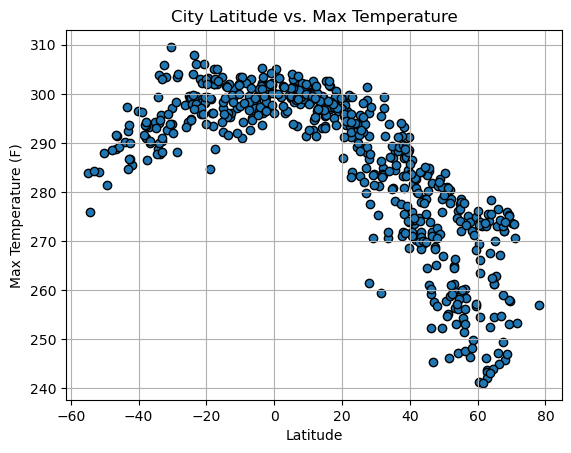

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

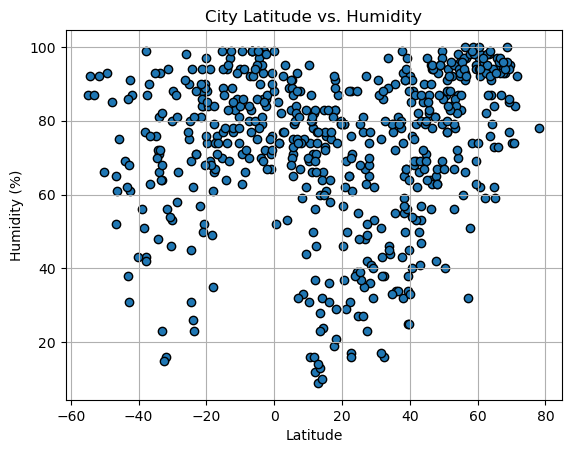

In [11]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

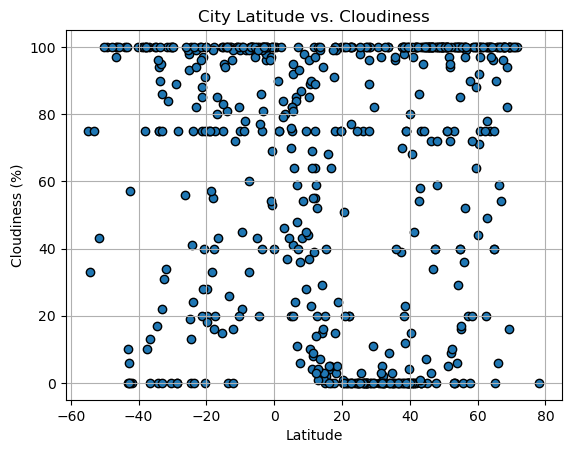

In [12]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

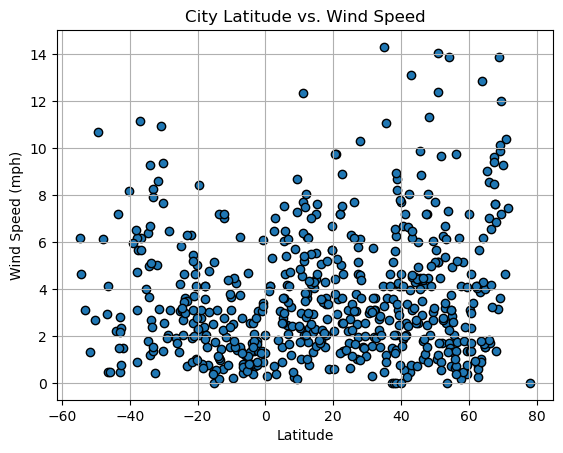

In [13]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    plt.annotate(line_eq, (min(x_values),min(y_values)),fontsize=15,color="red")
    plt.annotate(f"r = {round(rvalue,2)}", (min(x_values),min(y_values) + 10),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{hemisphere}_{title.replace(' ', '_')}.png")
    plt.show()

In [9]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,256.24,42,100,3.09,CA,1709252714
1,sabzevar,36.2126,57.6819,271.52,62,100,3.06,IR,1709252714
4,la ronge,55.1001,-105.2842,259.29,61,100,5.14,CA,1709252716
5,altay,47.8667,88.1167,259.01,49,3,3.75,CN,1709252716
6,dzhetygara,52.1908,61.2006,263.75,82,100,3.40,KZ,1709252716


In [10]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,292.33,62,46,0.45,AU,1709252715
3,port-aux-francais,-49.3500,70.2167,277.27,83,100,12.63,TF,1709252715
8,lebu,-37.6167,-73.6500,286.82,84,9,8.19,CL,1709252716
12,adamstown,-25.0660,-130.1015,299.92,69,98,1.47,PN,1709252717
17,invercargill,-46.4000,168.3500,292.51,57,94,1.70,NZ,1709252719


###  Temperature vs. Latitude Linear Regression Plot

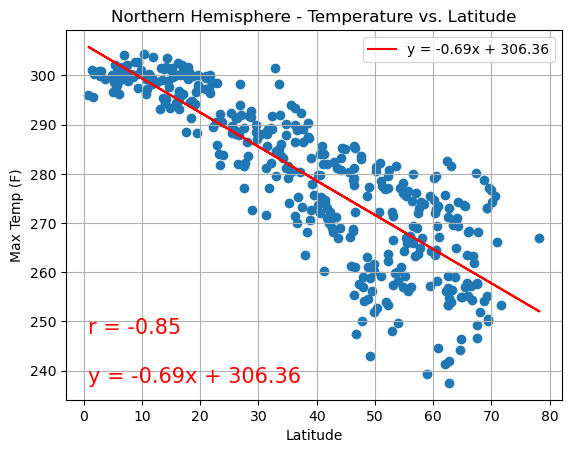

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Temperature vs. Latitude", "Latitude", "Max Temp (F)", "Northern")


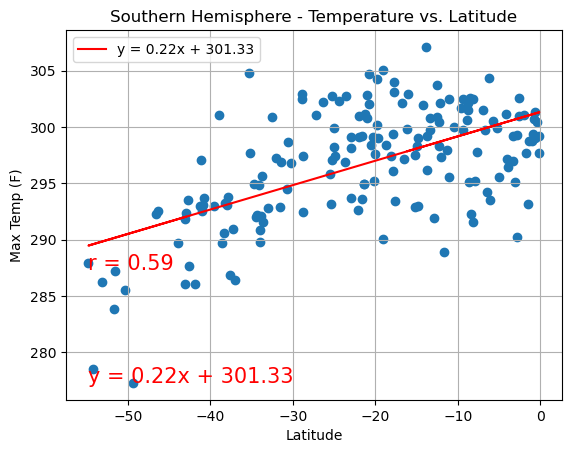

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Temperature vs. Latitude", "Latitude", "Max Temp (F)", "Southern")

**Discussion about the linear relationship:** 

*Max Temp*

Using a linear regression on our Max Temp vs Lat graph we see that as latitude increases (meaning we are traveling north, away from the equator) the Max Temp decreases. We have an r-value of -0.85 which shows that there is a very strong negative correlation between Max Temp and Latitude.

At first glance, our graph for the Southern Hemisphere looks like it is showing the opposite effect when heading South away from the equator. The r-value is positive showing a positive correlation between higher Max Temps and higher latitudinal values. However, we must remember that when moving south of the equator, latitude lines are measured using negative values. This means that Max Temp decreases as we move further and further south of the equator, just like it did when we moved further and further north. Our r-value isn't showing a correlation that is quite as strong as it did in the NOrthern Hemisphere, an r-value of 0.59 is still a pretty strong correlation between the variables.

### Humidity vs. Latitude Linear Regression Plot

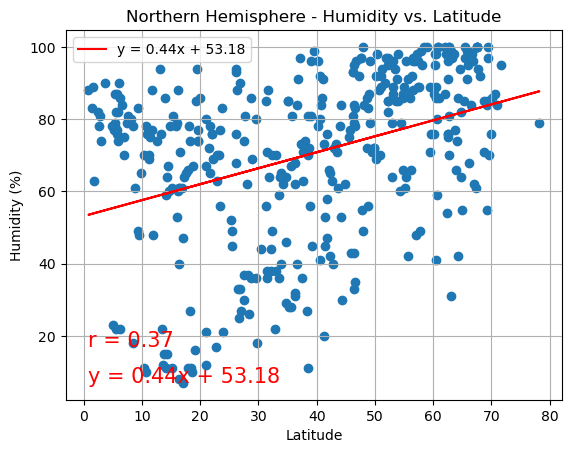

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Humidity vs. Latitude", "Latitude", "Humidity (%)", "Northern")

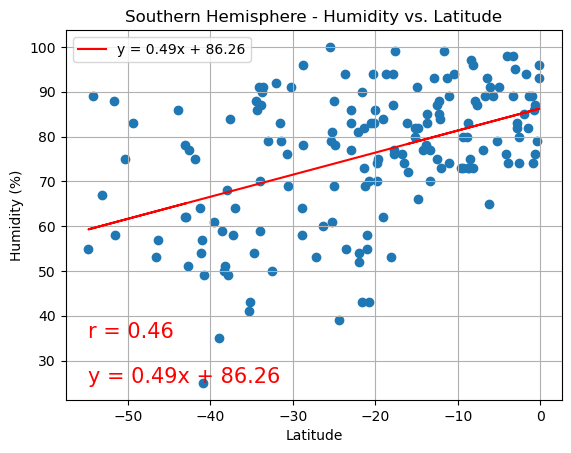

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Humidity vs. Latitude", "Latitude", "Humidity (%)", "Southern")

**Discussion about the linear relationship:** 

*Humidity*

Unlike our Max Temp vs Latitude graph, the correlation here is not very strong. There is some correlation, but no where near as clear here. The graph is showing that there is some correlation showing that as we move north from the equator the humidity being higher

Remembering the inverted manner of measuring latitude in the Southern Hemisphere, seeing a positive correlation in the south and the north means opposite things. As we move south, the humidity decreases as we move further from the equator. The correlation here is a bit stronger, but still not as strong as the correlation between Max Temp and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

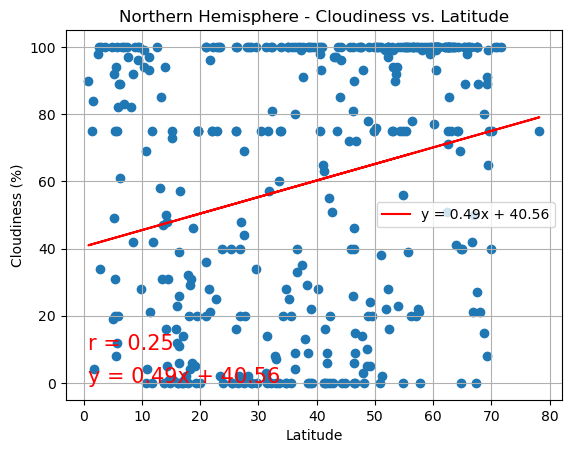

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Northern")

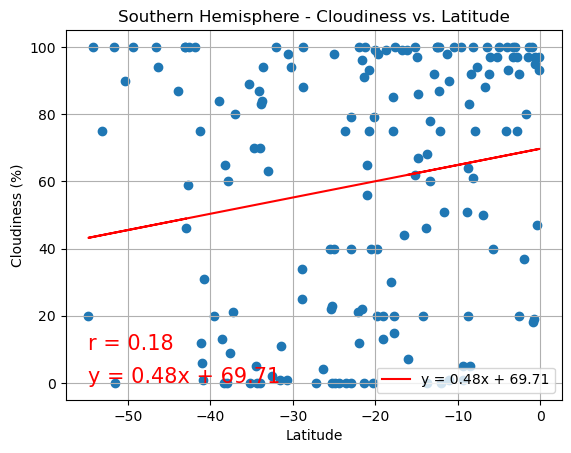

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Southern")

**Discussion about the linear relationship:** 

*Cloudiness*

This graph is the least correlated we've seen so far. With an r-value of 0.25, we can't see correlation between humidity and distance away from the equator. This is the same when we look at the Southern Hemisphere. The r-value is even closer to 0 than in the Northern Hemisphere at 0.18.




### Wind Speed vs. Latitude Linear Regression Plot

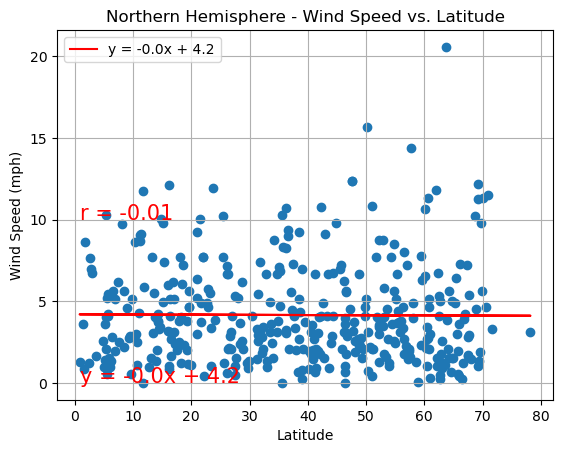

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Northern")

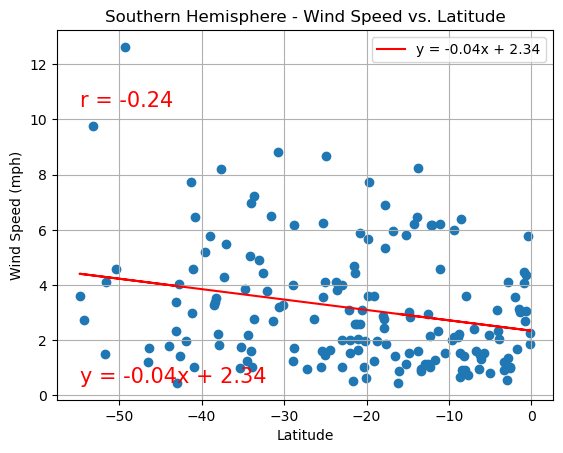

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Southern")

**Discussion about the linear relationship:** 

*Wind Speed*

Wind speed north of the equator seems completely random. The r-value of our graph is -0.01. This is an r-value incredibly close to 0 showing no correlation between wind speed as we move north of the equator.

The r-value in the southern hemisphere is also small, but not as extremely small. When I looked over the graphs as a full set, I noticed that difference between the r-values in the Max Temp graphs and the Wind Speed graphs was similar. Since the correlation is fairly insignificant in the wind speed graphs are minimal, it might not mean anything, but the slight correlation in the Southern Hemisphere wind speed graph might cause outliers in the Max Temp graph that bring the r-value closer to 0. 